## 資料蒐集

In [26]:
import requests
from bs4 import BeautifulSoup
rs = requests.session()
res = rs.get('https://rent.591.com.tw/?kind=1&region=17&section=247')
soup = BeautifulSoup(res.text, 'lxml')
token = soup.select_one('meta[name="csrf-token"]')['content']

In [27]:
token

'ly5MJASnMBqR3n2U7OvxCteLOZxXddTTzsCPzV4Z'

In [37]:
import pandas
headers = {
    'X-CSRF-TOKEN': token,
    'X-Requested-With': 'XMLHttpRequest'
}
apiurl = 'https://rent.591.com.tw/home/search/rsList?is_new_list=1&type=1&kind=1&searchtype=1&region=17&section=247&firstRow={}&totalRows=200'

pagenum = int (200 / 30) + 1
dataary = []
for p in range(pagenum):
    res2 = rs.get(apiurl.format(p*30), headers = headers)
    df = pandas.DataFrame(res2.json()['data']['data'])
    dataary.append(df)

In [43]:
import pandas
df = pandas.concat(dataary)
df.head()

,id,user_id,address,type,post_id,regionid,sectionid,streetid,room,area,...,icon_class,fulladdress,address_img_title,browsenum_name,unit,houseid,region_name,section_name,addInfo,onepxImg
0,10858475,287283,華豐街120巷瑞豐夜市3樓..,1,10858475,17,247,14194,3,27.0,...,rent,華豐街120巷瑞豐夜市3樓公寓,瑞豐夜市3樓公寓,昨日瀏覽,元/月,10858475,高雄市,鼓山區,,
1,10922635,1387336,美術東八街美術館超稀有36..,1,10922635,17,247,14165,3,58.1,...,rent,美術東八街美術館超稀有360度全景觀超通風小豪宅,美術館超稀有360度全景觀超通風小豪宅,昨日瀏覽,元/月,10922635,高雄市,鼓山區,,
2,10885816,261913,美術東三路農16精美裝潢三..,1,10885816,17,247,14166,3,38.8,...,rent,美術東三路農16精美裝潢三房~傢俱.家電齊全~,農16精美裝潢三房~傢俱.家電齊全~,昨日瀏覽,元/月,10885816,高雄市,鼓山區,,
3,10808960,392946,明誠四路🍀帝門美術館第一排綠..,1,10808960,17,247,14140,4,86.9,...,rent,明誠四路🍀帝門美術館第一排綠景3+1房雙平車,🍀帝門美術館第一排綠景3+1房雙平車,昨日瀏覽,元/月,10808960,高雄市,鼓山區,,
4,10832533,392946,青海路🍀美術館鳳凰會泳池高檔..,1,10832533,17,247,14151,4,82.0,...,rent,青海路🍀美術館鳳凰會泳池高檔精品3+1房平車,🍀美術館鳳凰會泳池高檔精品3+1房平車,昨日瀏覽,元/月,10832533,高雄市,鼓山區,,


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 19
Data columns (total 88 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      200 non-null    int64  
 1   user_id                 200 non-null    int64  
 2   address                 200 non-null    object 
 3   type                    200 non-null    object 
 4   post_id                 200 non-null    int64  
 5   regionid                200 non-null    int64  
 6   sectionid               200 non-null    int64  
 7   streetid                200 non-null    int64  
 8   room                    200 non-null    int64  
 9   area                    200 non-null    float64
 10  price                   200 non-null    object 
 11  storeprice              200 non-null    int64  
 12  comment_total           200 non-null    int64  
 13  comment_unread          200 non-null    int64  
 14  comment_ltime           200 non-null    int

## 資料清理

### 取出想要的variable

In [45]:
df = df[['address', 'floor', 'allfloor', 'layout', 'area', 'price', 'browsenum_all']]
df.head()

,address,floor,allfloor,layout,area,price,browsenum_all
0,華豐街120巷瑞豐夜市3樓..,3,5,3房2廳2衛,27.0,"13,500",1709
1,美術東八街美術館超稀有36..,22,23,3房1廳2衛,58.1,"35,000",167
2,美術東三路農16精美裝潢三..,6,15,3房2廳2衛,38.8,"22,000",1184
3,明誠四路🍀帝門美術館第一排綠..,24,24,4房2廳2衛,86.9,"56,000",647
4,青海路🍀美術館鳳凰會泳池高檔..,12,24,4房2廳3衛,82.0,"60,000",479


### 把price從type'object'改成'int'

In [46]:
df['price'] = df['price'].map(lambda e: int(e.replace(',', '')))

In [47]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 19
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        200 non-null    object 
 1   floor          200 non-null    int64  
 2   allfloor       200 non-null    int64  
 3   layout         200 non-null    object 
 4   area           200 non-null    float64
 5   price          200 non-null    int64  
 6   browsenum_all  200 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 12.5+ KB


,address,floor,allfloor,layout,area,price,browsenum_all
0,華豐街120巷瑞豐夜市3樓..,3,5,3房2廳2衛,27.0,13500,1709
1,美術東八街美術館超稀有36..,22,23,3房1廳2衛,58.1,35000,167
2,美術東三路農16精美裝潢三..,6,15,3房2廳2衛,38.8,22000,1184
3,明誠四路🍀帝門美術館第一排綠..,24,24,4房2廳2衛,86.9,56000,647
4,青海路🍀美術館鳳凰會泳池高檔..,12,24,4房2廳3衛,82.0,60000,479


### 發現layout是object，不利數值分析，進一步轉換

In [48]:
df[['layout_bedroom', 'layout_livingroom', 'layout_bathroom']] = df['layout'].str.extract('(\d+)房(\d)廳(\d)衛')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 19
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   address            200 non-null    object 
 1   floor              200 non-null    int64  
 2   allfloor           200 non-null    int64  
 3   layout             200 non-null    object 
 4   area               200 non-null    float64
 5   price              200 non-null    int64  
 6   browsenum_all      200 non-null    int64  
 7   layout_bedroom     198 non-null    object 
 8   layout_livingroom  198 non-null    object 
 9   layout_bathroom    198 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 17.2+ KB


### 刪掉遺失值

In [50]:
df.dropna(inplace=True) #刪除遺失值

In [51]:
df.isna().sum()

address              0
floor                0
allfloor             0
layout               0
area                 0
price                0
browsenum_all        0
layout_bedroom       0
layout_livingroom    0
layout_bathroom      0
dtype: int64

### 轉成int

In [52]:
df['layout_bedroom'] = df['layout_bedroom'].astype(int)
df['layout_livingroom'] = df['layout_livingroom'].astype(int)
df['layout_bathroom'] = df['layout_bathroom'].astype(int)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 0 to 19
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   address            198 non-null    object 
 1   floor              198 non-null    int64  
 2   allfloor           198 non-null    int64  
 3   layout             198 non-null    object 
 4   area               198 non-null    float64
 5   price              198 non-null    int64  
 6   browsenum_all      198 non-null    int64  
 7   layout_bedroom     198 non-null    int32  
 8   layout_livingroom  198 non-null    int32  
 9   layout_bathroom    198 non-null    int32  
dtypes: float64(1), int32(3), int64(4), object(2)
memory usage: 14.7+ KB


In [54]:
df.head()

,address,floor,allfloor,layout,area,price,browsenum_all,layout_bedroom,layout_livingroom,layout_bathroom
0,華豐街120巷瑞豐夜市3樓..,3,5,3房2廳2衛,27.0,13500,1709,3,2,2
1,美術東八街美術館超稀有36..,22,23,3房1廳2衛,58.1,35000,167,3,1,2
2,美術東三路農16精美裝潢三..,6,15,3房2廳2衛,38.8,22000,1184,3,2,2
3,明誠四路🍀帝門美術館第一排綠..,24,24,4房2廳2衛,86.9,56000,647,4,2,2
4,青海路🍀美術館鳳凰會泳池高檔..,12,24,4房2廳3衛,82.0,60000,479,4,2,3


In [55]:
del df['layout'] #刪掉layout
df.head()

,address,floor,allfloor,area,price,browsenum_all,layout_bedroom,layout_livingroom,layout_bathroom
0,華豐街120巷瑞豐夜市3樓..,3,5,27.0,13500,1709,3,2,2
1,美術東八街美術館超稀有36..,22,23,58.1,35000,167,3,1,2
2,美術東三路農16精美裝潢三..,6,15,38.8,22000,1184,3,2,2
3,明誠四路🍀帝門美術館第一排綠..,24,24,86.9,56000,647,4,2,2
4,青海路🍀美術館鳳凰會泳池高檔..,12,24,82.0,60000,479,4,2,3


## 資料儲存

In [56]:
import sqlite3
with sqlite3.connect('house.sqlite') as db:
    df.to_sql('renthouse', con = db, if_exists = 'replace')

## 數據統計分析

In [57]:
df.describe()

,floor,allfloor,area,price,browsenum_all,layout_bedroom,layout_livingroom,layout_bathroom
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,10.040404,16.469697,45.030303,31173.732323,501.156566,2.838384,1.792929,1.747475
std,10.583887,5.722570,29.984153,19627.033282,687.883800,0.833403,0.418543,0.626706
min,1.000000,2.000000,12.000000,7000.000000,21.000000,1.000000,1.000000,1.000000
25%,4.000000,14.000000,24.600000,18000.000000,177.000000,2.000000,2.000000,1.000000
50%,9.000000,15.000000,34.900000,23000.000000,330.000000,3.000000,2.000000,2.000000
75%,12.000000,19.750000,62.950000,39000.000000,630.500000,3.000000,2.000000,2.000000
max,99.000000,29.000000,190.200000,128000.000000,7378.000000,5.000000,3.000000,4.000000


In [58]:
df.sort_values('price', ascending=False).head()

,address,floor,allfloor,area,price,browsenum_all,layout_bedroom,layout_livingroom,layout_bathroom
15,鼓山三路🍊美術鼎峰泳池尊榮雙..,23,23,190.2,128000,84,5,2,4
20,鼓山三路🍀服務費⑤折-鼎..,23,23,190.2,120000,202,5,2,4
22,美術南一街🍀美術館低調奢華豪..,3,14,116.7,85000,42,4,2,3
28,美術東五路🍀皇苑世紀3+1房空..,5,28,140.9,80000,153,4,2,2
12,美術館路🍀美術館泳池綠蔭3+1..,7,25,120.4,78000,203,4,2,3


Populating the interactive namespace from numpy and matplotlib


<AxesSubplot:>

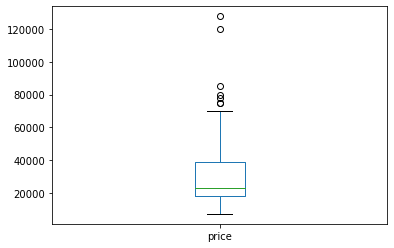

In [59]:
%pylab inline
df['price'].plot(kind = 'box')

Populating the interactive namespace from numpy and matplotlib


<AxesSubplot:ylabel='Frequency'>

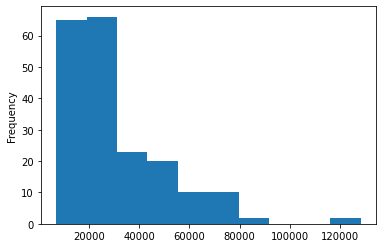

In [60]:
%pylab inline
df['price'].plot(kind = 'hist')

Populating the interactive namespace from numpy and matplotlib


<AxesSubplot:xlabel='area', ylabel='price'>

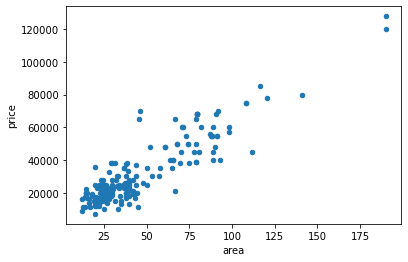

In [62]:
%pylab inline
df.plot(x = 'area', y ='price', kind = 'scatter')